# 0. EDA och filhantering
- a) Börja med att ladda ned datasetet Dogs vs Cats från Kaggle. Extrahera den och lägg den i din labfolder, glöm inte att lägga till den till .gitignore.

In [15]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from random import sample
import os
import numpy as np
import shutil
from PIL import Image
import seaborn as sns
import pandas as pd
import random
import plotly.graph_objects as go

# Paths

In [16]:
# val_path = 'original_data/val'
# test_path = 'original_data/test'

# Kontrollera om koden körs på Kaggle
# if "KAGGLE_KERNEL_RUN_TYPE" in os.environ:
    # Ange den Kaggle-specifika sökvägen till träningsdata
#    original_data = Path().absolute().parent / 'input' / 'train-data'
#    val_path = Path().absolute().parent / 'input' / 'val-data'

#print("Sökväg till träningsdata:", original_data)

In [17]:
#Check if the environment variable KAGGLE_KERNEL_RUN_TYPE is set
if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    current_path = Path('/kaggle/input/experiment-small-data')
    experiment_small_data = current_path/'experiment_small_data'
    #train_data_path = Path(os.path.join(dataset_path, 'original_data/train'))

else:
    current_path= Path().absolute()         # current path

train_path = experiment_small_data/'train'
test_path = experiment_small_data/'test'
val_path = experiment_small_data/'val'

print("Sökväg till träningsdata:", train_path)

Sökväg till träningsdata: /kaggle/input/experiment-small-data/experiment_small_data/train


In [18]:
# original_data = 'original_data/train'
# experiment_small_data = 'experiment_small_data'

b) Läs in 10 bilder slumpmässigt, plotta dem och extrahera deras labels och skriv ut i titeln.

In [19]:
# Create list with all images
#all_images = [os.path.join(original_data, f) for f in os.listdir(original_data) if os.path.isfile(os.path.join(original_data, f))]

# Pick 10 random pictures from the list
#random_images = sample(all_images, 10)

#def load_image(image_path):
#    img = cv2.imread(image_path)
#    # Makes images less blue
#    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#    return img

#def plot_images(images, labels):
#    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
#    for i, (image, label) in enumerate(zip(images, labels)):
#        ax = axes[i // 5, i % 5]
#        ax.imshow(image)
#        ax.set_title(label)
#        ax.axis('off')
#    plt.show()

# Load images
#images = [load_image(image_path) for image_path in random_images]
#labels = [os.path.basename(image_path).split('.')[0] for image_path in random_images]

#plot_images(images, labels)

c) Skapa folderstrukturen nedan med Python:
```
├── experiment_small_data
│   ├── test
│   ├── train
│   └── val
├── experiment_tiny_data
│   ├── test
│   ├── train
│   └── val
├── lab.ipynb
└── original_data
    ├── test
    └── train
```

In [20]:
#folders = [
#    ('experiment_small_data', ['test', 'train', 'val']),
#    ('experiment_tiny_data', ['test', 'train', 'val']),
#    ('original_data', [])
#]

#for folder, subfolders in folders:
#    for subfolder in subfolders:
#        Path(folder, subfolder).mkdir(parents=True, exist_ok=True)

d) Nu ska du göra train|val|test split med följande splits:

- train - 1600 (800 dogs, 800 cats)
- val - 400 (200 dogs, 200 cats)
- test - 500 (250 dogs, 250 cats)

# Hur blir det om man kör cellen 2 gånger?

In [21]:
# def copy_files(files, subdir):
#     for file in files:
#         # Copy files from 'original_folder' to 'target_dir'
#         shutil.copy(file, os.path.join(experiment_small_data, subdir, os.path.basename(file)))

# # Read files and shuffle 
# dog_files = [os.path.join(original_data, file) for file in os.listdir(original_data) if file.startswith('dog')]
# cat_files = [os.path.join(original_data, file) for file in os.listdir(original_data) if file.startswith('cat')]
# np.random.shuffle(dog_files)
# np.random.shuffle(cat_files)

# train_dogs, val_dogs, test_dogs = 800, 200, 250
# train_cats, val_cats, test_cats = 800, 200, 250

# # Sampling without replacement for dogs 
# dogs_train = dog_files[:train_dogs]
# dogs_val = dog_files[train_dogs:train_dogs+val_dogs]
# dogs_test = dog_files[train_dogs+val_dogs:train_dogs+val_dogs+test_dogs]

# copy_files(dogs_train, 'train')
# copy_files(dogs_val, 'val')
# copy_files(dogs_test, 'test')

# # Sampling without replacement for cats
# cats_train = cat_files[:train_cats]
# cats_val = cat_files[train_cats:train_cats+val_cats]
# cats_test = cat_files[train_cats+val_cats:train_cats+val_cats+test_cats]

# copy_files(cats_train, 'train')
# copy_files(cats_val, 'val')
# copy_files(cats_test, 'test')

e) Läs in dataseten från experiment_small, experiment_tiny (BONUS) och plocka ut labelsvektorer, som
ska vara one-hot encoded med 0 och 1.

In [22]:
def get_image_filenames(directory):
    # Returns list with filenames that ends with '.jpg'  
    filenames = [file for file in os.listdir(directory) if file.endswith('.jpg')]
    random.shuffle(filenames)  # Shuffle the list
    return filenames

# Create lists with filenames
train_list = get_image_filenames(os.path.join(experiment_small_data, 'train'))
test_list = get_image_filenames(os.path.join(experiment_small_data, 'test'))
val_list = get_image_filenames(os.path.join(experiment_small_data, 'val'))

# Print number of files in each dataset 
print(f"Train files: {len(train_list)}")
print(f"Test files: {len(test_list)}")
print(f"Val files: {len(val_list)}")

Train files: 1600
Test files: 500
Val files: 400


In [23]:
def load_images(directory, filenames):
    # Load images and return list with numpy arrays 
    images = [np.array(Image.open(os.path.join(directory, filename))) for filename in filenames]
    return images

X_train = load_images(os.path.join(experiment_small_data, 'train'), train_list)
X_test = load_images(os.path.join(experiment_small_data, 'test'), test_list)
X_val = load_images(os.path.join(experiment_small_data, 'val'), val_list)

print(f"Train images: {len(X_train)}")
print(f"Test images: {len(X_test)}")
print(f"Val images: {len(X_val)}")

Train images: 1600
Test images: 500
Val images: 400


In [24]:
X_train[2].shape

(193, 299, 3)

In [25]:
# Extract labels from filenames
def extract_labels(filename):
    if 'cat' in filename:
        return 0
    else:
        return 1

y_train = [extract_labels(filename) for filename in train_list]
y_val = np.array([extract_labels(filename) for filename in val_list])
y_test = [extract_labels(filename) for filename in test_list]

In [26]:
y_train[:20]

[1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0]

# Plot
Plotta några bilder med deras respektive labels och kontrollera att det är korrekt.

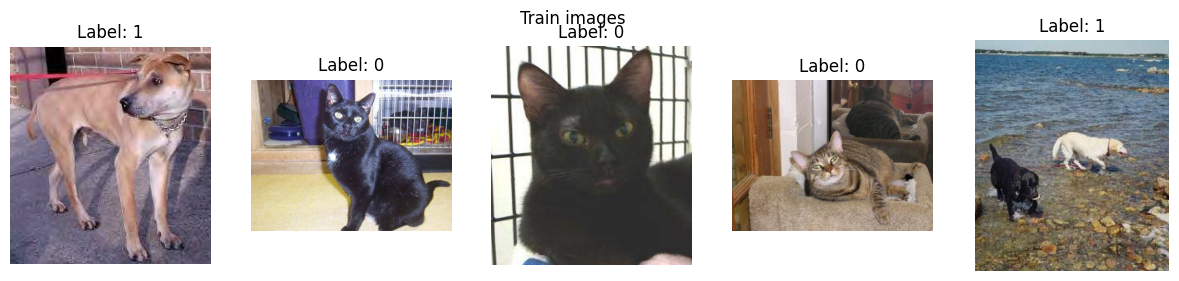

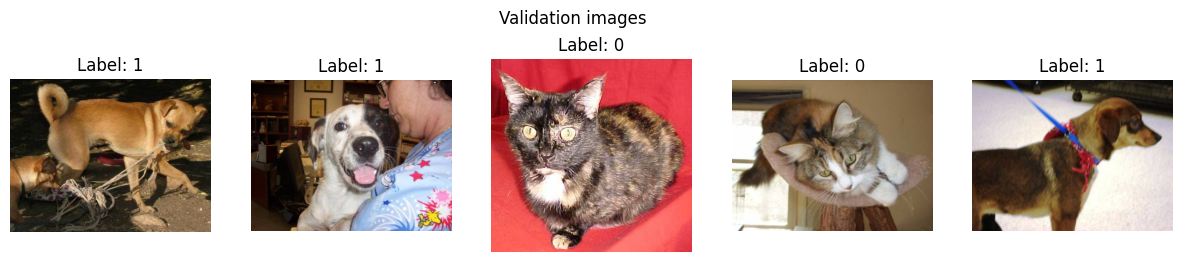

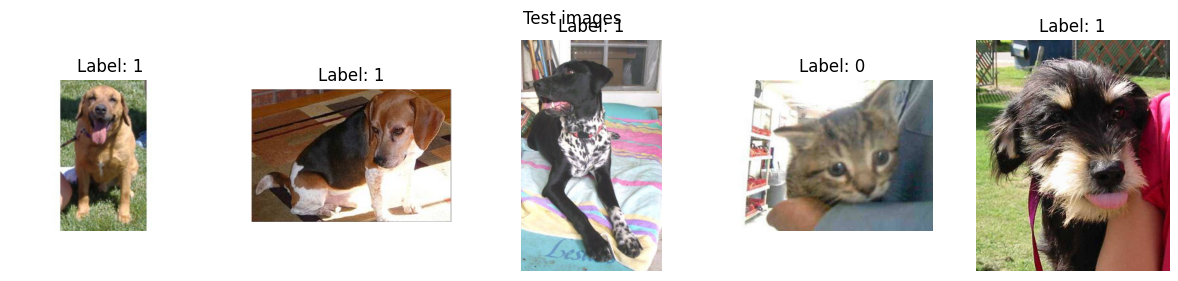

In [27]:
def plot_images_labels(images, labels, title, num_images=5):
    # Choose 6 random images and labels   
    indices = np.random.choice(range(len(images)), num_images, replace=False)
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 3, 3))
    for ax, index in zip(axes, indices):
        ax.imshow(images[index])
        ax.set_title(f'Label: {labels[index]}')
        ax.axis('off')  
    plt.suptitle(title)
    plt.show()

plot_images_labels(X_train, y_train, 'Train images')
plot_images_labels(X_val, y_val, 'Validation images')
plot_images_labels(X_test, y_test, 'Test images')

Skapa lämplig plot för att kontrollera att dataseten är balanserade

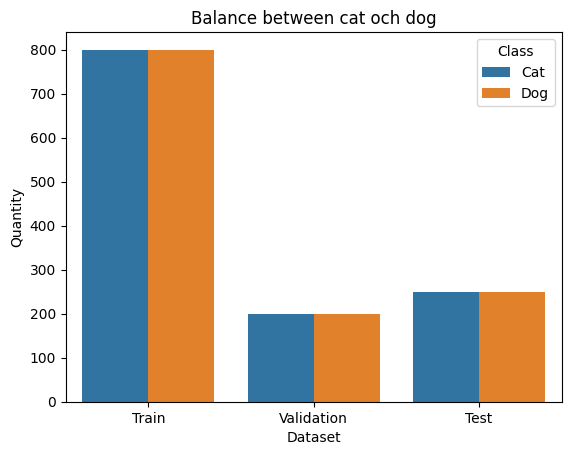

In [28]:
# Function to count all labels
def count_labels(labels):
    cat_count = sum(label == 0 for label in labels)
    dog_count = sum(label == 1 for label in labels)
    return cat_count, dog_count

# Count number of cat and dog in each dataset
train_cat_count, train_dog_count = count_labels(y_train)
val_cat_count, val_dog_count = count_labels(y_val)
test_cat_count, test_dog_count = count_labels(y_test)

data = {
    'Dataset': ['Train', 'Validation', 'Test'],
    'Cat': [train_cat_count, val_cat_count, test_cat_count],
    'Dog': [train_dog_count, val_dog_count, test_dog_count]
}

df = pd.DataFrame(data)

# Transform DataFrame to long format for Seaborn
df_long = df.melt(id_vars='Dataset', var_name='Class', value_name='Count')

sns.barplot(data=df_long, x='Dataset', y='Count', hue='Class')
plt.xlabel('Dataset')
plt.ylabel('Quantity')
plt.title('Balance between cat och dog')
plt.show()

Skapa lämplig plot för att kontrollera att dataseten är slumpade, dvs inte ex:
[0, 0, ... 0, 1, 1, ..., 1]

In [29]:
# Create a list with index for each dataset
train_index = list(range(len(y_train)))
val_index = list(range(len(y_train), len(y_train) + len(y_val)))
test_index = list(range(len(y_train) + len(y_val), len(y_train) + len(y_val) + len(y_test)))

fig = go.Figure()

# Dataset
fig.add_trace(go.Scatter(x=train_index, y=y_train, mode='markers', name='Train'))
fig.add_trace(go.Scatter(x=val_index, y=y_val, mode='markers', name='Validation'))
fig.add_trace(go.Scatter(x=test_index, y=y_test, mode='markers', name='Test'))

fig.update_layout(title='Shuffled dataset with index',
                  xaxis_title='Index',
                  yaxis_title='Label',
                  yaxis=dict(
                      tickvals=[0, 1],
                      ticktext=['Cat', 'Dog']
                  ))

fig.show()

# 1. Bildbehandling
a) Skapa en plot för att visualisera bildstorlekarna i träningsdatan. Använd seaborns jointplot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



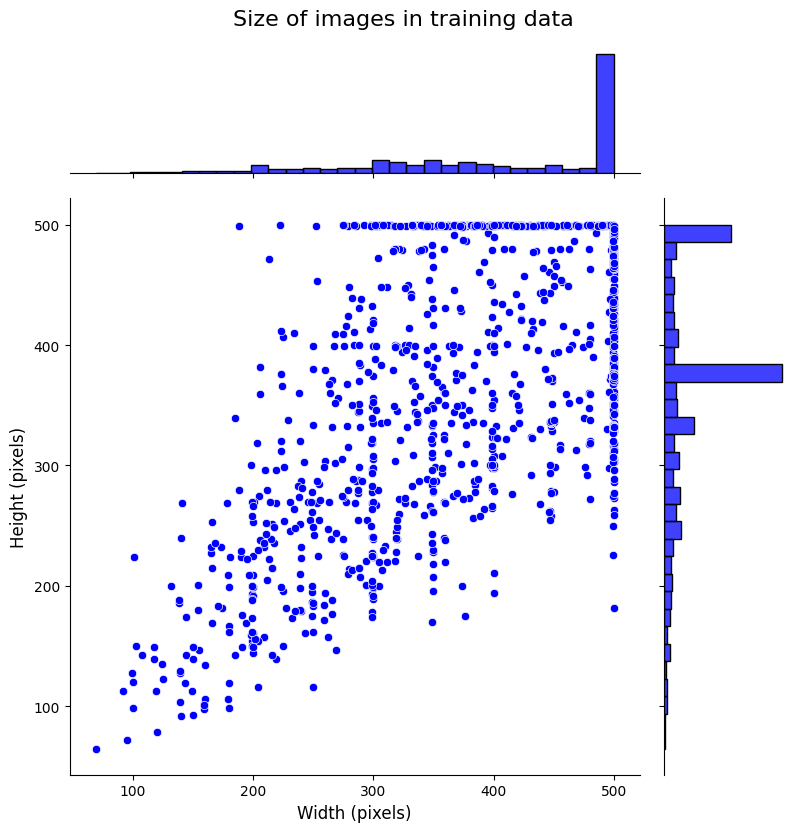

In [30]:
def get_image_sizes(directory, filenames):
    sizes = []
    for filename in filenames:
        with Image.open(os.path.join(directory, filename)) as img:
            sizes.append(img.size)  # img.size returns tuple of (width, height)
    return sizes

# Create array with image sizes
train_sizes = [image.shape[:2] for image in X_train]

# Get imagesize for all images in 'experiment_small_data/train'
train_sizes = get_image_sizes(os.path.join(experiment_small_data, 'train'), train_list)

# Create dataframe
sizes_df = pd.DataFrame(train_sizes, columns=['Width', 'Height'])

# Create jointplot
jp = sns.jointplot(data=sizes_df, x='Width', y='Height', kind='scatter', color='b', marginal_kws=dict(bins=30, fill=True), height=8, ratio=4)

jp.fig.suptitle('Size of images in training data', fontsize=16, y=1.03)  
jp.set_axis_labels('Width (pixels)', 'Height (pixels)', fontsize=12)

plt.show()

b) Välj en lämplig bildstorlek att ändra samtliga bilder till. Gör en analys och fundera på om du behöver
slänga bilder. Hur kommer du fram till ditt val?

Jag valde att slänga bilder med bredd <80 och höjd <100 för att behålla bildkvaliten eftersom förstoring kan leda till suddighet, pixering och förlust av detaljer. Jag valde att resiza bilderna till 180x180 för att sedan göra 
train|val|test. Mindre bilder kräver mindre minne och beräkningskraft.

# Plot efter rensade bilder

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



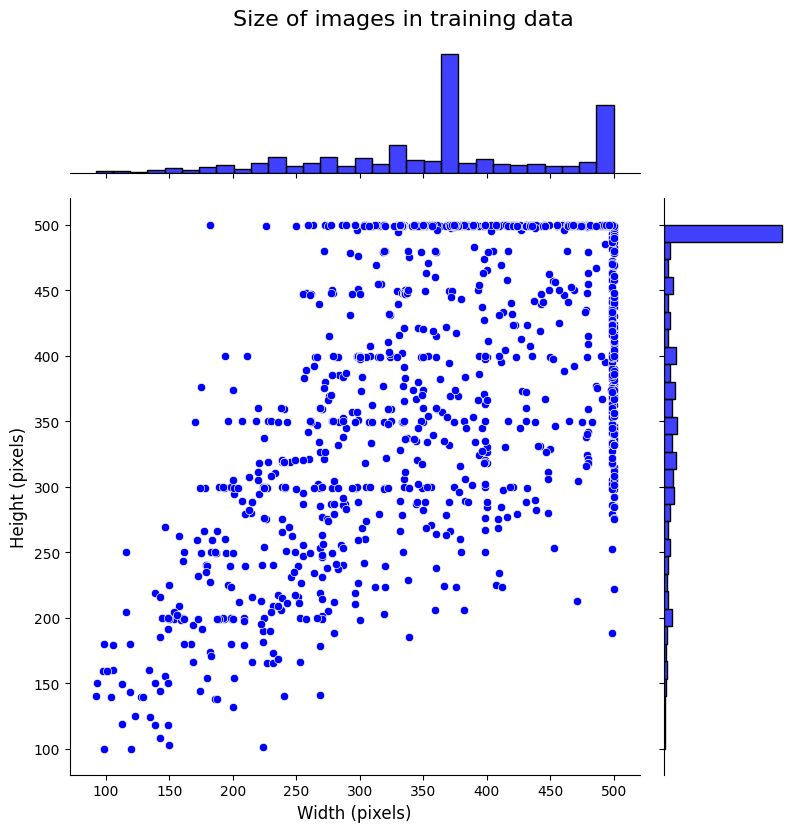

In [31]:
def get_image_sizes(directory, filenames):
    sizes = []
    for filename in filenames:
        with Image.open(os.path.join(directory, filename)) as img:
            sizes.append(img.size)  # img.size returns tuple of (width, height)
    return sizes

# Create array with image sizes
train_sizes = [image.shape[:2] for image in X_train]

# Filter out images with width < 80 and height < 100
filtered_train_sizes = [size for size in train_sizes if size[0] >= 80 and size[1] >= 100]

# Create dataframe
sizes_df = pd.DataFrame(filtered_train_sizes, columns=['Width', 'Height'])

# Create jointplot
jp = sns.jointplot(data=sizes_df, x='Width', y='Height', kind='scatter', color='b', marginal_kws=dict(bins=30, fill=True), height=8, ratio=4)

jp.fig.suptitle('Size of images in training data', fontsize=16, y=1.03)  
jp.set_axis_labels('Width (pixels)', 'Height (pixels)', fontsize=12)

plt.show()

c) Gör resize sådant att samtliga bilder är samma storlek och spara dem i numpy arrays med följande
struktur:

(samples, row, cols, color_channels) 

In [32]:
def resize_images(directory, filenames, size=(180, 180)):
    image_data = np.zeros((len(filenames), size[0], size[1], 3))
    for i, filename in enumerate(filenames):
        with Image.open(os.path.join(directory, filename)) as img:
            img = img.resize(size, Image.Resampling.LANCZOS)
            img_array = np.array(img)
            if img_array.shape[-1] == 4:  # Check if the image has an alpha channel
                img_array = img_array[..., :3]  # Remove alpha channel
            image_data[i] = img_array  # Assign the processed image to image_data at index i
    return image_data

X_train = resize_images(train_path, train_list)
X_val = np.array(resize_images(val_path, val_list))
X_test = np.array(resize_images(test_path, test_list))

In [33]:
X_train.shape

(1600, 180, 180, 3)

In [34]:
# Create list with indices
indices_to_keep = [i for i, size in enumerate(train_sizes) if size in filtered_train_sizes]

# Keep images from indices_to_keep
X_train = np.array([X_train[i] for i in indices_to_keep])
y_train = np.array([y_train[i] for i in indices_to_keep])

In [35]:
X_train.shape

(1595, 180, 180, 3)

In [36]:
y_train.shape

(1595,)

# Scaling

In [37]:
X_train[1].flatten().min(), X_train[1].flatten().max()

(0.0, 255.0)

In [38]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_val = X_val.astype('float32') / 255

In [39]:
print(X_train.flatten().min(), X_train.flatten().max())
print(X_test.flatten().min(), X_test.flatten().max())
print(X_val.flatten().min(), X_val.flatten().max())

0.0 1.0
0.0 1.0
0.0 1.0


# 2. Träna modeller
a) Använd följande nätverk och träna på datan. Gör hyperparametertuning för några parametrar (beskriv
hur du gör). Visualisera och analysera loss-kurvor, accuracy-kurvor.

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
def cnn_model(learning_rate=0.001, dropout_rate=0.3, kernels=[32, 64, 128, 128]):
    adam = Adam(learning_rate=learning_rate)
    model = Sequential(name='CNN_model')
    
    # Adding layers with Conv2D and MaxPooling2D
    for kernel in kernels:
        model.add(
            Conv2D(
                kernel, 
                kernel_size=(3, 3),
                activation='relu', 
                kernel_initializer='he_normal',  # Initializing weights
                input_shape=(180, 180, 3) if not model.layers else None
            )
        )
        model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    
    model.add(Flatten())  # Flatten layer
    model.add(Dropout(dropout_rate))  # Dropout layer
    model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))  # Fully connected layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer

    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['acc'])

    return model

model = cnn_model()
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     5,308,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,550,273 (21.17 MB)

 Trainable params: 5,550,273 (21.17 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
early_stopper = EarlyStopping(monitor='val_acc', mode='max', patience=15)

model.fit(
    X_train,
    y_train,
    epochs=50,
    callbacks=[early_stopper],
    validation_data=(X_val, y_val)
)

Epoch 1/50
 3/50 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - acc: 0.5069 - loss: 7.4061 

I0000 00:00:1716366652.809781     152 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716366652.828908     152 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - acc: 0.5201 - loss: 2.5112

W0000 00:00:1716366660.959840     155 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716366661.904356     155 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 219ms/step - acc: 0.5200 - loss: 2.4861 - val_acc: 0.5025 - val_loss: 0.6915
Epoch 2/50
 5/50 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - acc: 0.5329 - loss: 0.6894

W0000 00:00:1716366663.600625     155 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 0.5371 - loss: 0.6875 - val_acc: 0.6150 - val_loss: 0.6615
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 0.6338 - loss: 0.6598 - val_acc: 0.5900 - val_loss: 0.6729
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 0.6115 - loss: 0.6476 - val_acc: 0.6025 - val_loss: 0.6652
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 0.6491 - loss: 0.6130 - val_acc: 0.6400 - val_loss: 0.6597
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.7110 - loss: 0.5536 - val_acc: 0.6850 - val_loss: 0.6314
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 0.7391 - loss: 0.5262 - val_acc: 0.7075 - val_loss: 0.5942
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.7743 - loss: 0.4644 - val_acc: 0.6600 - val_loss: 0.7182
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 0.7843 - loss: 0.4469 - val_acc: 0.6575 - val_loss: 0.7005
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 0.8124 - loss: 0

In [43]:
metrics = pd.DataFrame(model.history.history)

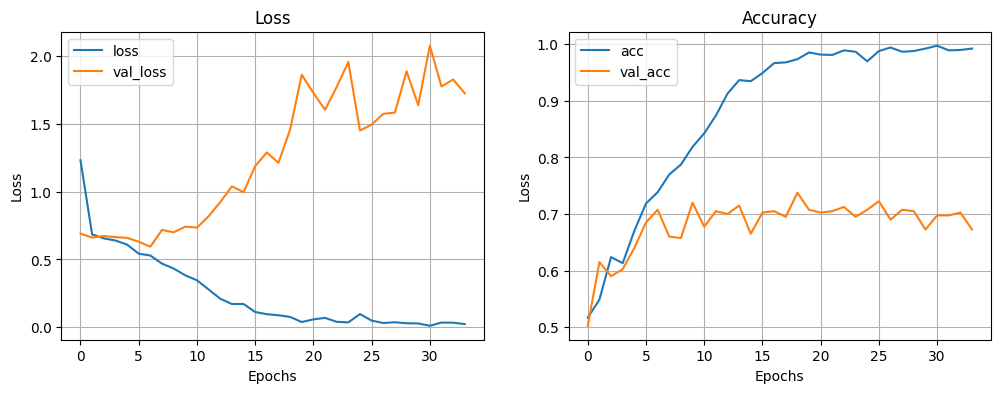

In [44]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel="Epochs", ylabel="Loss")
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel="Epochs", ylabel="Loss")

plot_metrics(metrics)

c) Välj en modell, träna på tränings- och valideringsdatan. Gör inferens på testdatan och utvärdera din
modell.
- Jag ändrar hyperparametern epochs = 10

In [45]:
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

In [46]:
model = cnn_model()
model.fit(
    X_train_val,
    y_train_val,
    epochs=10,
    callbacks=[early_stopper]
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
 5/63 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - acc: 0.5122 - loss: 6.6274

W0000 00:00:1716366726.428848     153 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - acc: 0.5083 - loss: 2.1405
Epoch 2/10
 5/63 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - acc: 0.5615 - loss: 0.6760

W0000 00:00:1716366733.251535     152 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning:

Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: acc,loss



63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - acc: 0.5401 - loss: 0.6895
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - acc: 0.5649 - loss: 0.6833
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - acc: 0.6023 - loss: 0.6631
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.6364 - loss: 0.6302
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - acc: 0.7175 - loss: 0.5789
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.7442 - loss: 0.5174
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.7856 - loss: 0.4518
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - acc: 0.8213 - loss: 0.4056
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.8487 - loss: 0.3481


In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.applications import Xception

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


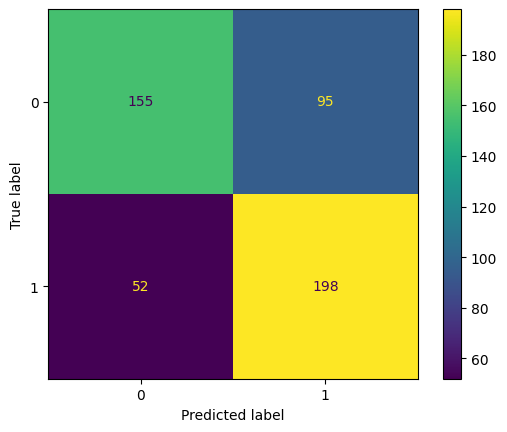

              precision    recall  f1-score   support

     Class 0       0.75      0.62      0.68       250
     Class 1       0.68      0.79      0.73       250

    accuracy                           0.71       500
   macro avg       0.71      0.71      0.70       500
weighted avg       0.71      0.71      0.70       500



In [50]:
# Gör prediktioner på testdatan
y_pred_prob = model.predict(X_test)

# Konvertera sannolikheter till binära prediktioner
y_pred = (y_pred_prob > 0.5).astype(int)

# Skapa och visa en förvirringsmatris
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

# Generera och skriv ut en klassificeringsrapport
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(class_report)

d) Utför därefter transfer learning och evaluera din modell. Beskriv också hur transfer learning fungerar.

In [67]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

def build_transfer_model():
    feature_extractor = Xception(
        weights='imagenet', include_top=False, input_shape=(180, 180, 3)
    )
    
    transfer_model = Sequential(
        [
            feature_extractor, # Xception
            GlobalAveragePooling2D(),
            Flatten(),
            Dropout(0.3),
            Dense(512, activation='relu', kernel_initializer='he_normal'),
            Dense(1, activation='sigmoid')
        ]
    )

    # Freeze Xception layers
    for layer in feature_extractor.layers:
        layer.trainable = False

    transfer_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])

    return transfer_model

# Bygg en ny instans av transfer model
transfer_model = build_transfer_model()

# Visa modellsummering med en fast batchstorlek
batch_size = 32
transfer_model.build(input_shape=(batch_size, 180, 180, 3))
transfer_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (32, 6, 6, 2048)       │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (32, 2048)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (32, 2048)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (32, 2048)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (32, 512)              │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (32, 1)                │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,911,081 (83.58 MB)

 Trainable params: 1,049,601 (4.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [68]:
transfer_model.fit(
    X_train,
    y_train,
    epochs=10,
    callbacks=[early_stopper],
    validation_data=(X_val, y_val)
)

Epoch 1/10
 2/50 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - acc: 0.5781 - loss: 0.6698

W0000 00:00:1716368741.374836     155 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - acc: 0.9136 - loss: 0.1841

W0000 00:00:1716368747.963827     153 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716368751.569705     153 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 255ms/step - acc: 0.9145 - loss: 0.1826 - val_acc: 0.9825 - val_loss: 0.0818
Epoch 2/10
 2/50 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - acc: 1.0000 - loss: 0.0079

W0000 00:00:1716368753.929070     152 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - acc: 0.9896 - loss: 0.0287 - val_acc: 0.9825 - val_loss: 0.0726
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - acc: 0.9915 - loss: 0.0210 - val_acc: 0.9675 - val_loss: 0.0746
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - acc: 0.9870 - loss: 0.0387 - val_acc: 0.9800 - val_loss: 0.0702
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - acc: 0.9987 - loss: 0.0045 - val_acc: 0.9825 - val_loss: 0.0771
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - acc: 0.9982 - loss: 0.0059 - val_acc: 0.9750 - val_loss: 0.1081
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - acc: 0.9916 - loss: 0.0127 - val_acc: 0.9800 - val_loss: 0.0791
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - acc: 0.9980 - loss: 0.0068 - val_acc: 0.9775 - val_loss: 0.0935
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - acc: 0.9985 - loss: 0.0044 - val_acc: 0.9825 - val_loss: 0.1028
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - acc: 0.9972 - loss: 0

In [70]:
metrics2 = pd.DataFrame(transfer_model.history.history)

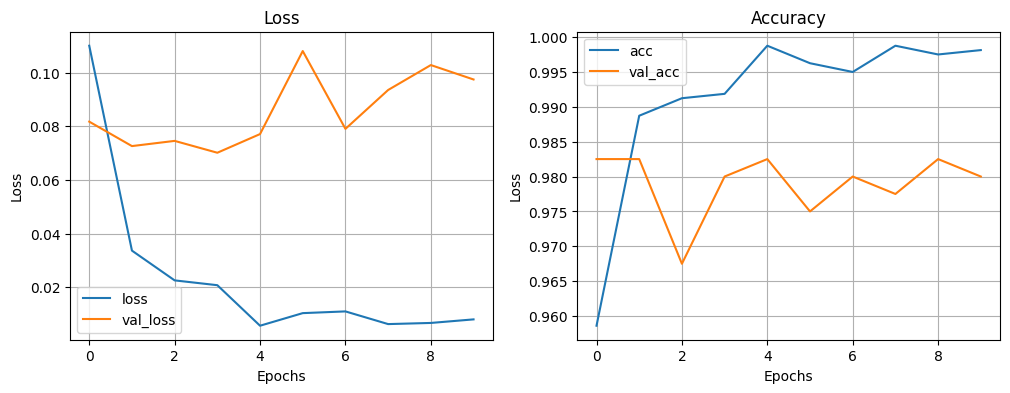

In [71]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel="Epochs", ylabel="Loss")
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel="Epochs", ylabel="Loss")

plot_metrics(metrics2)

In [72]:
transfer_model = build_transfer_model()
transfer_model.fit(
    X_train_val,
    y_train_val,
    epochs=10,
    callbacks=[early_stopper],
)

Epoch 1/10
 2/63 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - acc: 0.6797 - loss: 0.6590

W0000 00:00:1716368947.365388     154 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 185ms/step - acc: 0.9341 - loss: 0.1662
Epoch 2/10
 1/63 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - acc: 1.0000 - loss: 0.0012

W0000 00:00:1716368958.875952     153 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning:

Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: acc,loss



63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - acc: 0.9900 - loss: 0.0380
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - acc: 0.9963 - loss: 0.0189
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - acc: 0.9956 - loss: 0.0143
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - acc: 0.9952 - loss: 0.0154
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - acc: 0.9978 - loss: 0.0072
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - acc: 0.9968 - loss: 0.0097
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - acc: 0.9988 - loss: 0.0039
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - acc: 0.9987 - loss: 0.0029
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - acc: 1.0000 - loss: 0.0011


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


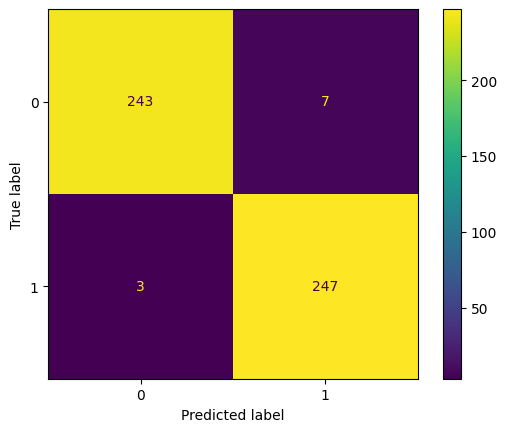

              precision    recall  f1-score   support

     Class 0       0.99      0.97      0.98       250
     Class 1       0.97      0.99      0.98       250

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



In [76]:
# Gör prediktioner på testdatan
y_pred_prob = transfer_model.predict(X_test)

# Konvertera sannolikheter till binära prediktioner
y_pred = (y_pred_prob > 0.5).astype(int)

# Skapa och visa en förvirringsmatris
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

# Generera och skriv ut en klassificeringsrapport
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(class_report)